## *Statistics coded:* Government Finance Statistics

Prepared by [**Bonamino Luca**](luca.bonamino@hotmail.com)

This notebook aims at illustrating the *Statistics Expplained* article on [government finance statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php/Government_finance_statistic).


## Settings required

### Built-il libraries

In [1]:
import requests
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable

### Costum libraries

In [2]:
costum_lib_locations = ['../src']
for location in costum_lib_locations:
    if location not in sys.path:
        sys.path.append('../src')
import requestLib
import dataDealer

### Variables needed in the notebook

In [3]:
noCountry = ['European Union - 27 countries (2007-2013)' ,
             'European Union - 25 countries (2004-2006)',
             'Euro area - 18 countries (2014)',
             'Euro area - 17 countries (2011-2013)' 
            ]

clean_country = {'Germany': 'Germany',
                 'Euro area - 19' : 'Euro Area (EA-19)', 
                 'European Union - 27 countries (from ': 'EU-27', 
                 'European Union - 28' : 'EU-28'}

host_url = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
client = requestLib.RequestHandeler(host_url)

# Public Balance 2018 and 2019

[+] OK! Data recieved
	Succesful response


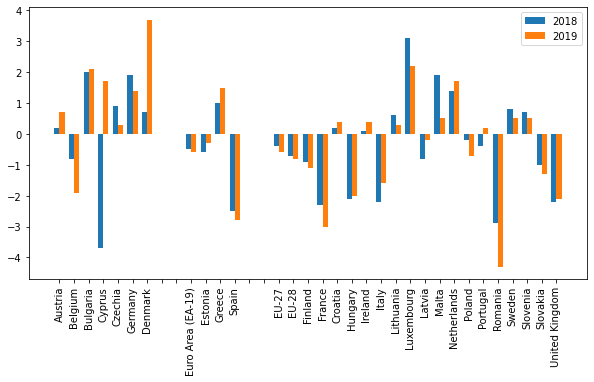

In [4]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

args = requestLib.args_to_dict('table= gov_10dd_edpt1', 'na_item=B9', 'precision=1', 'unit=PC_GDP', 'time=2018,2019','sector=S13')


data , strdata, response = client.get_request(args)

times = list(list(data['dimension']['time']['category'].values())[1].values())
country = list(list(data['dimension']['geo']['category'].values())[1].values())
values = list(data['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=True, 
                                         clean_dict=clean_country)

plot_x_labels = dataDealer.clean_label(lines=country, remove_list=noCountry)
pos = np.arange(len(plot_x_labels))

fig, ax = plt.subplots()
ax.set_xticks(pos)
ax.set_xticklabels(plot_x_labels, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()


# Public Balance and General Governement Debt, 2016-2019

In [5]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=B9', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    'sector=S13')

data , strdata, response = client.get_request(args) 

times = list(list(data['dimension']['time']['category'].values())[1].values())
country = list(list(data['dimension']['geo']['category'].values())[1].values())
values = list(data['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=False, 
                                         clean_dict=clean_country)

balance = dataDealer.subjason_to_DataFrame(lines=country, columns=times, subDict=years)


args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    'sector=S13')
data , strdata, response = client.get_request(args) 

country = list(list(data['dimension']['geo']['category'].values())[1].values())
values = list(data['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=False, 
                                         clean_dict=clean_country)

debt = dataDealer.subjason_to_DataFrame(lines=country, columns=times, subDict=years)

result = pd.concat([balance, debt], axis=1, sort=False)
#print(result)
######
#### TO DO: print the full table

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


## General government debt, 2019 and 2018

[+] OK! Data recieved
	Succesful response


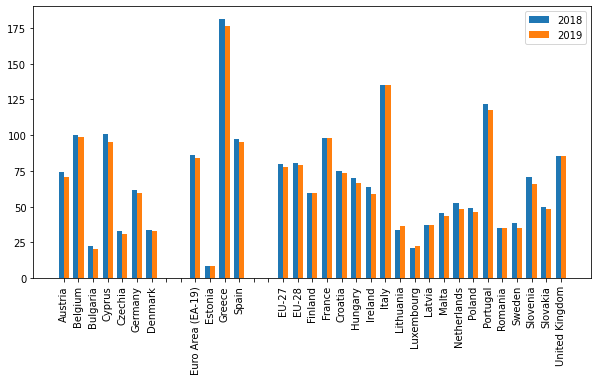

In [6]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2018,2019',
                    'sector=S13')


data , strdata, response = client.get_request(args)

times = list(list(data['dimension']['time']['category'].values())[1].values())
country = list(list(data['dimension']['geo']['category'].values())[1].values())
values = list(data['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=True, 
                                         clean_dict=clean_country)
plot_x_labels = dataDealer.clean_label(lines=country, remove_list=noCountry)

pos = np.arange(len(plot_x_labels))

fig, ax = plt.subplots()
ax.set_xticks(pos)
ax.set_xticklabels(plot_x_labels, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()

## Government revenu and expenditure 2009 - 2019 

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


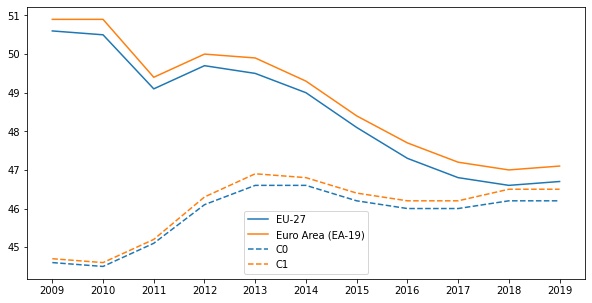

In [37]:
plot_colors = ['C0', 'C1']

args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TE', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

data , strdata, response = client.get_request(args)
values = dataDealer.check_data_by_status(data)

times = list(list(data['dimension']['time']['category'].values())[1].values())
country = list(list(data['dimension']['geo']['category'].values())[1].values())
expendures = values

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=expendures,
                                         clean_dict=clean_country)

y = {'EU-27': [], 'Euro Area (EA-19)': []}
for ykey in y:
    for key in years:
        y[ykey].append(years[key][ykey])
x = list(years.keys())
i = 0
for key in y:
    plt.plot(x,y[key], label=key, color=plot_colors[i])
    i += 1

args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TR', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

data , strdata, response = client.get_request(args)
values = dataDealer.check_data_by_status(data)

times = list(list(data['dimension']['time']['category'].values())[1].values())
country = list(list(data['dimension']['geo']['category'].values())[1].values())
revenues = values

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=revenues,
                                         clean_dict=clean_country)

y = {'EU-27': [], 'Euro Area (EA-19)': []}
for ykey in y:
    for key in years:
        y[ykey].append(years[key][ykey])

x = list(years.keys())
i = 0
for key in y:
    plt.plot(x,y[key], ls='--', label=plot_colors[i])
    i += 1
plt.legend(loc='lower center')
plt.show()

### Restore import settings

In [38]:
# lanch as last commend to restore the previous python import settings
for location in costum_lib_locations:
    sys.path.remove(location)